## DSIP - Advance level real-world based project on DataScience (May-June 2022)

### Task2 - Make a color detection system with the help of Panda and Open CV based on the provided dataset.

### Author - Karan Doke
Dataset link: https://github.com/codebrainz/color-names/blob/master/output/colors.csv

### Importing Libraries

In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

### Reading image path

In [2]:
img = cv2.imread('E:\\INTERNSHIP\\Devstack Solution Internship\\DSIP_DataScience & AI Internship\\DSIP_Task2_ColorDetectionSystem\\img.jpg')

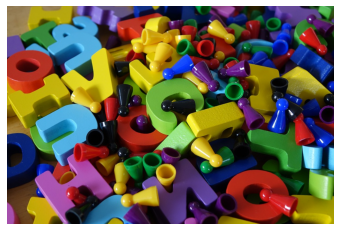

In [3]:
plt.imshow(img[:,:,::-1])
plt.axis(False)
plt.show()

### Declaring global variables (which are used later on)

In [4]:
mouse_click = False
r = g = b = xpos = ypos = 0

### Read the color dataset

In [5]:
index = ['color', 'color_name', 'hex', 'R', 'G', 'B']
data = pd.read_csv('E:\\INTERNSHIP\\Devstack Solution Internship\\DSIP_DataScience & AI Internship\\DSIP_Task2_ColorDetectionSystem\\colors.csv', names = index, header = None)
data.head()

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [6]:
data.shape

(865, 6)

In [7]:
data.sample(10)

,color,color_name,hex,R,G,B
341,gray,Gray,#808080,128,128,128
362,heart_gold,Heart Gold,#808000,128,128,0
762,tan,Tan,#d2b48c,210,180,140
159,chestnut,Chestnut,#cd5c5c,205,92,92
160,china_pink,China Pink,#de6fa1,222,111,161
50,bistre,Bistre,#3d2b1f,61,43,31
92,brink_pink,Brink Pink,#fb607f,251,96,127
13,android_green,Android Green,#a4c639,164,198,57
241,dark_terra_cotta,Dark Terra Cotta,#cc4e5c,204,78,92
531,new_york_pink,New York Pink,#d7837f,215,131,127


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   color       865 non-null    object
 1   color_name  865 non-null    object
 2   hex         865 non-null    object
 3   R           865 non-null    int64 
 4   G           865 non-null    int64 
 5   B           865 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 40.7+ KB


### Displaying text on the image

In [9]:
text = "Right Double Click to display corresponding image coordinates in dataset"
coordinates = (270,550)
font = cv2.FONT_ITALIC
fontScale = 0.5
color = (255,255,255)
thickness = 1
image = cv2.putText(img, text, coordinates, font, fontScale, color, thickness, cv2.LINE_AA)

### Function to calculate minimum distance from all colors and get the most matching color

In [10]:
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(data)):
        d = abs(R- int(data.loc[i,"R"])) + abs(G- int(data.loc[i,"G"]))+ abs(B- int(data.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = data.loc[i,"color_name"]
    return cname

### Function to get x,y coordinates of mouse double click

In [11]:
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, mouse_click
        mouse_click = True
        xpos = x
        ypos = y
        b,g,r = image[y,x]
        b = int(b)
        g = int(g)
        r = int(r)
    elif event==cv2.EVENT_RBUTTONDBLCLK:
         # displaying the nearest coordinates from the dataset on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        t = getColorName(r,g,b)
        red,blue,green=int(data.loc[data['color_name']==t]['R']),int(data.loc[data['color_name']==t]['B']),int(data.loc[data['color_name']==t]['G'])
        cv2.putText(image, str(red) + ',' +
                    str(green) + ',' + str(blue),
                    (x,y), 1, 1,
                    (255, 255, 255), 2)

In [12]:
cv2.namedWindow('Image for Color Detection-Left Button Mouse Double Click') #Window name in which the image is displayed
cv2.setMouseCallback('Image for Color Detection-Left Button Mouse Double Click',draw_function)

In [ ]:
while(1):

    cv2.imshow('Image for Color Detection-Left Button Mouse Double Click',image)
    if (mouse_click):
   
        #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
        cv2.rectangle(image,(20,20), (750,60), (b,g,r), -1)

        #Creating text string to display( Color name and RGB values )
        text = getColorName(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)
        
        #cv2.putText(image,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(image, text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)

        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(image, text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        mouse_click=False

    #Break the loop when user hits 'esc' key    
    if cv2.waitKey(20) & 0xFF ==27:
        break
    
cv2.destroyAllWindows()